In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install -q keras

In [ ]:
import keras

In [ ]:
train='/content/drive/MyDrive/archive/train'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import BatchNormalization
import os
import seaborn as sb

In [ ]:
SIZE=128

In [ ]:
train_images=[]
train_labels=[]

In [ ]:
for directory_path in glob.glob("/content/drive/MyDrive/archive (2)/train/*"):
    label = os.path.basename(directory_path)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)


In [ ]:
train_images=np.array(train_images)
train_labels=np.array(train_labels)

In [ ]:
test_images=[]
test_labels=[]

In [ ]:
for directory_path in glob.glob("/content/drive/MyDrive/archive (2)/test/*"):
    t_label = os.path.basename(directory_path)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(t_label)

In [ ]:
test_images=np.array(test_images)
test_labels=np.array(test_labels)

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded=le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded=le.transform(train_labels)

In [ ]:
x_train,y_train,x_test,y_test=train_images,train_labels_encoded,test_images,test_labels_encoded

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Sequential, Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


activation = 'sigmoid'
SIZE = 128

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation=activation, padding='same', input_shape=(SIZE, SIZE, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation=activation, padding='same', kernel_initializer='he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation=activation, padding='same', kernel_initializer='he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation=activation, padding='same', kernel_initializer='he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())
feature_extractor.add(Flatten())


In [ ]:
input_layer = Input(shape=(SIZE, SIZE, 3))
features = feature_extractor(input_layer)
intermediate_model = Model(inputs=input_layer, outputs=features)

In [ ]:
X_train_features = intermediate_model.predict(x_train)
X_test_features = intermediate_model.predict(x_test)


63/63 [==============================] - 5s 84ms/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(11879, 128, 128, 3)
(2000, 128, 128, 3)


In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

In [ ]:
pipe.fit(X_train_features, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

In [ ]:
y_pred=pipe.predict(X_test_features)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print("Hybrid Model Accuracy:", accuracy)

Hybrid Model Accuracy: 0.938


1/1 [==============================] - 0s 29ms/step
The prediction for this image is:  ['Malignant']
The actual label for this image is:  Malignant


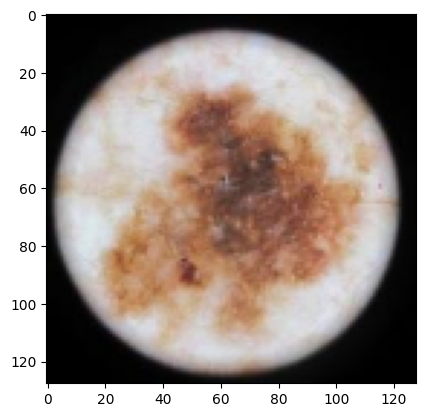

In [ ]:
n=450
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
input_img_features=intermediate_model.predict(input_img)
prediction_RF = pipe.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[945  65]
 [ 58 942]]
